<h1>Plots for Income and Market Value</h1>

Heat maps

In [3]:
import pandas as pd

df = pd.read_excel('town services and housing costs public.xlsx', encoding='UTF-8')
plotdf = df[df.ResponsibleCode == 1].copy()
print (plotdf.columns)
print (plotdf.Age.count())


Index(['ActivityCary', 'ActivityComCenter', 'ActivityConservation',
       'ActivityCount', 'ActivityField', 'ActivityFirePolice', 'ActivityGolf',
       'ActivityLPS', 'ActivityLexpress', 'ActivityMinutemanBikeway',
       'ActivityPlayground', 'ActivitySenior', 'ActivitySwim', 'ActivityTown',
       'Age', 'AgeCode', 'AgeCode1', 'AgeCode2', 'AgeORStatMean', 'AgeStat',
       'AgeStatMean', 'Disabilities', 'HouseholdSize',
       'HouseholdSizeORStatMean', 'HouseholdSizeStat', 'HouseholdSizeStatMean',
       'Income', 'IncomeCode', 'IncomeCode1', 'IncomeCode2',
       'IncomeORStatMean', 'IncomeStat', 'IncomeStatMean', 'MarketValue',
       'MarketValueCode', 'MarketValueCode1', 'MarketValueORStatMean',
       'MarketValueStat', 'MarketValueStatMean', 'MeansTestedApprox',
       'MonthlyHousingCost', 'MonthlyHousingCostCode',
       'MonthlyHousingCostCode1', 'MonthlyHousingORStatMean',
       'MonthlyHousingStat', 'MonthlyHousingStatMean', 'MonthlyRent',
       'MonthlyRentCode', 'Mo

Autosaving every 30 seconds


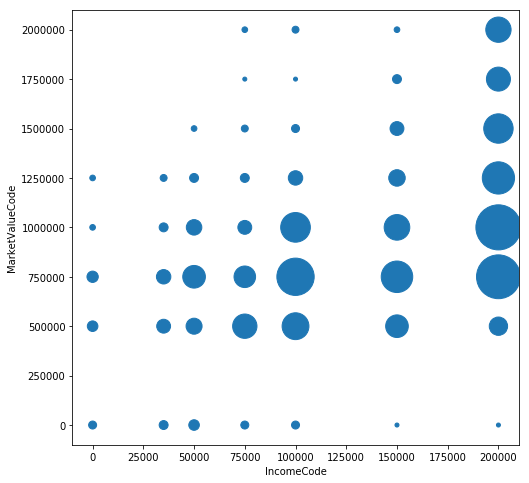

In [4]:
%matplotlib inline
%autosave 30
import matplotlib.pyplot as plt

mvidf = plotdf.groupby(['MarketValueCode', 'IncomeCode']).size().reset_index(name="num")
mvidf.plot.scatter('IncomeCode', 'MarketValueCode', s=mvidf.num*16, figsize=(8,8)) # s=mvidf.count)

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, $1,000,000-$1,249,999 to Less than $500,000
Data columns (total 7 columns):
$100,000-$149,999    8 non-null float64
$150,000-$199,999    8 non-null float64
$200,000 and over    8 non-null float64
$35,000-$49,999      5 non-null float64
$50,000-$74,999      6 non-null float64
$75,000-$99,000      8 non-null float64
Less than $35,000    5 non-null float64
dtypes: float64(7)
memory usage: 512.0+ bytes
None
---
{'$2,000,000 and more': [0], '$1,750,000-$1,999,999': [1], '$1,500,000-$1,749,999': [2], '$1,250,000-$1,499,999': [3], '$1,000,000-$1,249,999': [4], '$750,000-$999,999': [5], '$500,000-$749,999': [6], 'Less than $500,000': [7]}
                       Less than $35,000  $35,000-$49,999  $50,000-$74,999  \
$1,000,000-$1,249,999                2.0              5.0             14.0   
$1,250,000-$1,499,999                1.0              3.0              5.0   
$1,500,000-$1,749,999                NaN              NaN              

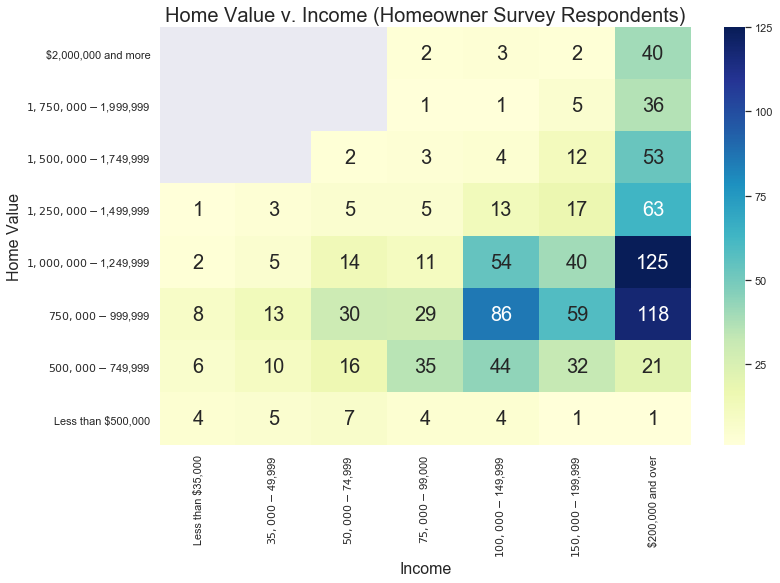

In [9]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
dfc = plotdf.loc[(plotdf['OwnRent']=='Own'),
                 ['MarketValueCode', 'MarketValue', 'Income']]
dfp = pd.pivot_table(dfc,  values='MarketValueCode',
                     index='MarketValue', columns='Income', aggfunc='count')

#for col in dfp.columns:
#    dfp[col] = dfp[col].astype('int32')
print (dfp.info())

print ('---')
incseq = ['$200,000 and over', '$150,000-$199,999', '$100,000-$149,999', '$75,000-$99,000',
      '$50,000-$74,999', '$35,000-$49,999', 'Less than $35,000']

mvseq = ['$2,000,000 and more', '$1,750,000-$1,999,999', '$1,500,000-$1,749,999',
      '$1,250,000-$1,499,999', '$1,000,000-$1,249,999', '$750,000-$999,999',
      '$500,000-$749,999', 'Less than $500,000']


dfp=dfp[list(reversed(incseq))]
custom_dict = {}
for cntr, i in enumerate(mvseq):
    custom_dict[i] = [cntr]

print (custom_dict)
temp_dict = pd.DataFrame.from_dict(custom_dict, orient='index', columns=['seq'])
#print temp_dict

dfp = dfp.merge(temp_dict, left_index=True, right_index=True, how='inner')
print(dfp)

dfp.sort_values(by=['seq'], inplace=True)
dfp.drop(['seq'], axis=1, inplace=True)
print (dfp)
sns.heatmap(dfp, fmt='.0f', annot=True, cmap='YlGnBu', annot_kws={"size": 20})
ax = plt.gca()
ax.set_title('Home Value v. Income (Homeowner Survey Respondents)', fontdict={'fontsize':20})
ax.set_ylabel('Home Value', fontsize=16)
ax.set_xlabel('Income', fontsize=16)
plt.tight_layout()
plt.savefig('market_value_income_heatmap.png')
plt.show()

<h3>Split by Type of House: Esp Condo v. Single Family Home</h3>

['single family home' 'condominium' 'multi-family home' nan]
$200,000 and over    435
$100,000-$149,999    183
$150,000-$199,999    155
$75,000-$99,000       74
$50,000-$74,999       66
$35,000-$49,999       30
Less than $35,000     15
Name: Income, dtype: int64
{'$2,000,000 and more': [0], '$1,750,000-$1,999,999': [1], '$1,500,000-$1,749,999': [2], '$1,250,000-$1,499,999': [3], '$1,000,000-$1,249,999': [4], '$750,000-$999,999': [5], '$500,000-$749,999': [6], 'Less than $500,000': [7]}
single family home


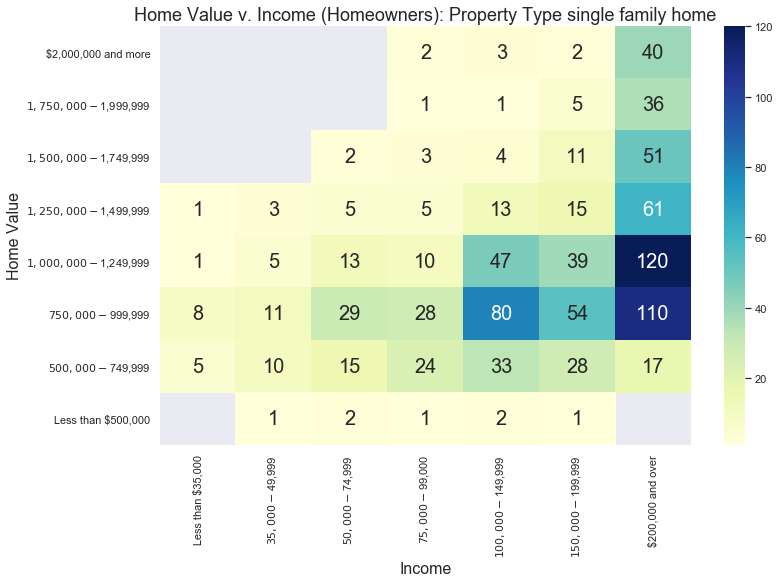

$100,000-$149,999    22
$200,000 and over    14
$75,000-$99,000      14
$50,000-$74,999       7
Less than $35,000     6
$35,000-$49,999       6
$150,000-$199,999     2
Name: Income, dtype: int64
{'$2,000,000 and more': [0], '$1,750,000-$1,999,999': [1], '$1,500,000-$1,749,999': [2], '$1,250,000-$1,499,999': [3], '$1,000,000-$1,249,999': [4], '$750,000-$999,999': [5], '$500,000-$749,999': [6], 'Less than $500,000': [7]}
condominium


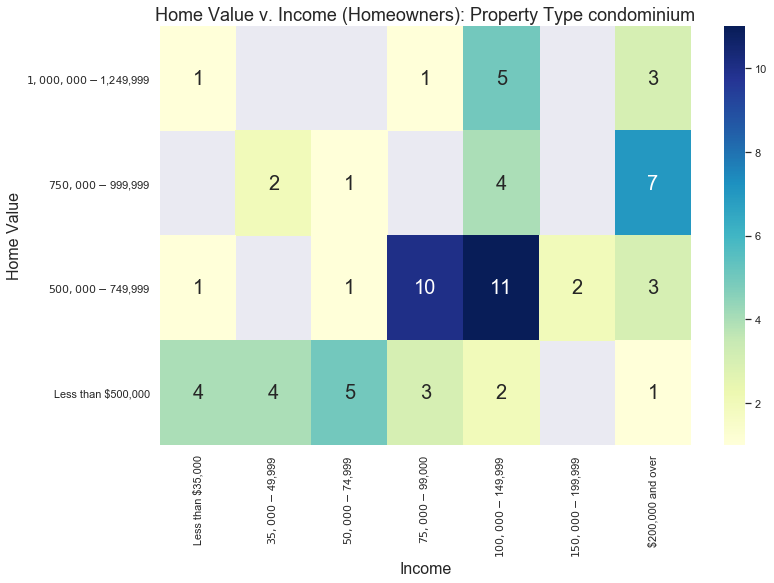

In [11]:
basedf = plotdf[(plotdf.OwnRent=='Own')]
print (basedf.PropertyType.unique())
for proptype in ['single family home',u'condominium']:  # not enough responses:,'multi-family home']:
    proptypedf = basedf[basedf.PropertyType == proptype]
    
    print (proptypedf.Income.value_counts())
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    dfc = proptypedf.loc[(proptypedf['OwnRent']=='Own'),
                     ['MarketValueCode', 'MarketValue', 'Income']]
    dfp = pd.pivot_table(dfc,  values='MarketValueCode',
                         index='MarketValue', columns='Income', aggfunc='count')

    #print dfp.info()
    incseq = ['$200,000 and over', '$150,000-$199,999', '$100,000-$149,999', '$75,000-$99,000',
          '$50,000-$74,999', '$35,000-$49,999', 'Less than $35,000']

    mvseq = ['$2,000,000 and more', '$1,750,000-$1,999,999', '$1,500,000-$1,749,999',
          '$1,250,000-$1,499,999', '$1,000,000-$1,249,999', '$750,000-$999,999',
          '$500,000-$749,999', 'Less than $500,000']


    dfp=dfp[list(reversed(incseq))]
    custom_dict = {}
    for cntr, i in enumerate(mvseq):
        custom_dict[i] = [cntr]

    print (custom_dict)
    temp_dict = pd.DataFrame.from_dict(custom_dict, orient='index', columns=['seq'])
    #print temp_dict

    dfp = dfp.merge(temp_dict, left_index=True, right_index=True, how='inner')

    dfp.sort_values(by=['seq'], inplace=True)
    dfp.drop(['seq'], axis=1, inplace=True)
    sns.heatmap(dfp, fmt='.0f', annot=True, cmap='YlGnBu', annot_kws={"size": 20})
    ax = plt.gca()
    ax.set_title('Home Value v. Income (Homeowners): Property Type %s' % proptype,
                fontdict={'fontsize':18})

    ax.set_ylabel('Home Value', fontsize=16)
    ax.set_xlabel('Income', fontsize=16)
    plt.tight_layout()
    plt.savefig('market_value_income_proptype_%s_heatmap.png' % proptype)
    print (proptype)
    plt.show()

<h3>Stress variation by Market Value and Income</h3>


<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, $1,000,000-$1,249,999 to Less than $500,000
Data columns (total 7 columns):
$100,000-$149,999    8 non-null float64
$150,000-$199,999    8 non-null float64
$200,000 and over    8 non-null float64
$35,000-$49,999      5 non-null float64
$50,000-$74,999      6 non-null float64
$75,000-$99,000      8 non-null float64
Less than $35,000    5 non-null float64
dtypes: float64(7)
memory usage: 512.0+ bytes
None
{'$2,000,000 and more': [0], '$1,750,000-$1,999,999': [1], '$1,500,000-$1,749,999': [2], '$1,250,000-$1,499,999': [3], '$1,000,000-$1,249,999': [4], '$750,000-$999,999': [5], '$500,000-$749,999': [6], 'Less than $500,000': [7]}
                       Less than $35,000  $35,000-$49,999  $50,000-$74,999  \
$1,000,000-$1,249,999           0.000000            2.400         2.214286   
$1,250,000-$1,499,999           3.000000            2.000         1.800000   
$1,500,000-$1,749,999                NaN              NaN         2.500000 

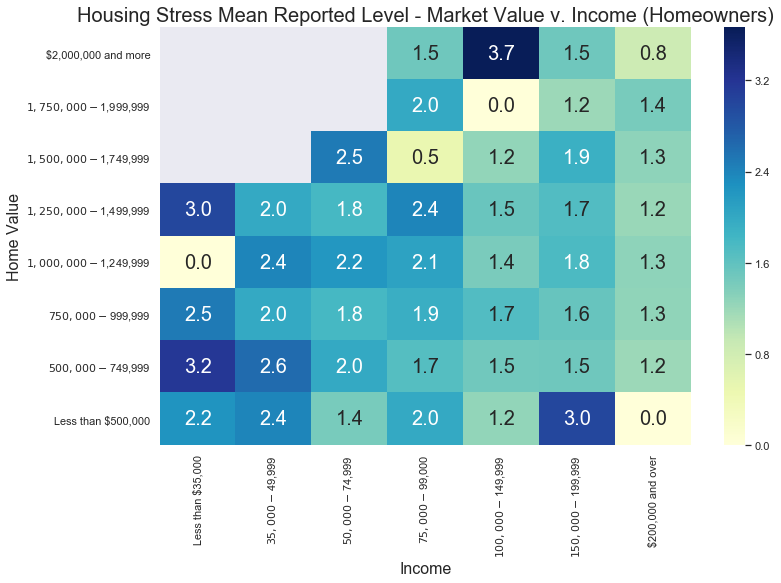

In [13]:
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})
dfc = plotdf.loc[(plotdf['OwnRent']=='Own'),
                 ['StressCode', 'MarketValue', 'Income']]
dfp = pd.pivot_table(dfc,  values='StressCode',
                     index='MarketValue', columns='Income', aggfunc='mean')

#for col in dfp.columns:
#    dfp[col] = dfp[col].astype('int32')
print (dfp.info())

incseq = ['$200,000 and over', '$150,000-$199,999', '$100,000-$149,999', '$75,000-$99,000',
      '$50,000-$74,999', '$35,000-$49,999', 'Less than $35,000']

mvseq = ['$2,000,000 and more', '$1,750,000-$1,999,999', '$1,500,000-$1,749,999',
      '$1,250,000-$1,499,999', '$1,000,000-$1,249,999', '$750,000-$999,999',
      '$500,000-$749,999', 'Less than $500,000']


dfp=dfp[list(reversed(incseq))]
custom_dict = {}
for cntr, i in enumerate(mvseq):
    custom_dict[i] = [cntr]

print (custom_dict)
temp_dict = pd.DataFrame.from_dict(custom_dict, orient='index', columns=['seq'])
#print temp_dict

dfp = dfp.merge(temp_dict, left_index=True, right_index=True, how='inner')
print (dfp)

dfp.sort_values(by=['seq'], inplace=True)
dfp.drop(['seq'], axis=1, inplace=True)
print (dfp)
sns.heatmap(dfp, fmt='.1f', annot=True, cmap='YlGnBu', annot_kws={"size": 20})
ax = plt.gca()
ax.set_title('Housing Stress Mean Reported Level - Market Value v. Income (Homeowners)', fontdict={'fontsize':20})
ax.set_ylabel('Home Value', fontsize=16)
ax.set_xlabel('Income', fontsize=16)
plt.tight_layout()
plt.savefig('market_value_income_heatmap_stress_mean.png')
plt.show()

Some           441
None           311
Little         306
Significant    220
Substantial     70
Name: Stress, dtype: int64
 0      1058
 100     290
-1        42
Name: HighStress, dtype: int64
High Stress Percent
<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, $1,000,000-$1,249,999 to Less than $500,000
Data columns (total 7 columns):
$100,000-$149,999    8 non-null float64
$150,000-$199,999    8 non-null float64
$200,000 and over    8 non-null float64
$35,000-$49,999      5 non-null float64
$50,000-$74,999      6 non-null float64
$75,000-$99,000      8 non-null float64
Less than $35,000    5 non-null float64
dtypes: float64(7)
memory usage: 512.0+ bytes
None
{'$2,000,000 and more': [0], '$1,750,000-$1,999,999': [1], '$1,500,000-$1,749,999': [2], '$1,250,000-$1,499,999': [3], '$1,000,000-$1,249,999': [4], '$750,000-$999,999': [5], '$500,000-$749,999': [6], 'Less than $500,000': [7]}
                       Less than $35,000  $35,000-$49,999  $50,000-$74,999  \
$1,000,000-$1,249,9

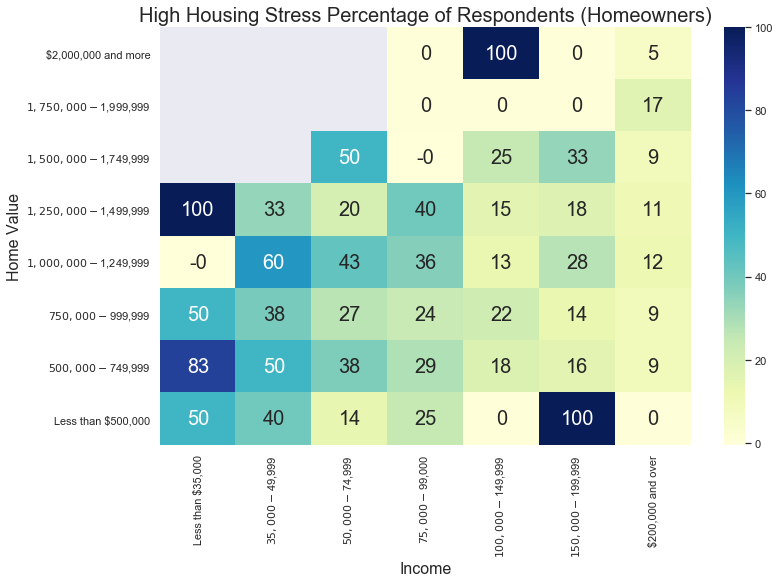

In [14]:
# Have high stress: portion having either signficant or substantial stress reported

high_stress_map = {'None': 0,
    'Little': 0,
     'Some':0,
    'Significant':100,
    'Substantial':100}

plotdf['HighStress'] = -1

for key in high_stress_map:
     plotdf.loc[plotdf['Stress'] == key, 'HighStress'] = high_stress_map[key]
        
print (plotdf.Stress.value_counts())
print (plotdf.HighStress.value_counts())

print ('High Stress Percent')
sns.set(rc={'figure.figsize':(11.7,8.27)})
dfc = plotdf.loc[(plotdf['OwnRent']=='Own'),
                 ['HighStress', 'MarketValue', 'Income']]
dfp = pd.pivot_table(dfc,  values='HighStress',
                     index='MarketValue', columns='Income', aggfunc='mean')

#for col in dfp.columns:
#    dfp[col] = dfp[col].astype('int32')
print (dfp.info())

incseq = ['$200,000 and over', '$150,000-$199,999', '$100,000-$149,999', '$75,000-$99,000',
      '$50,000-$74,999', '$35,000-$49,999', 'Less than $35,000']

mvseq = ['$2,000,000 and more', '$1,750,000-$1,999,999', '$1,500,000-$1,749,999',
      '$1,250,000-$1,499,999', '$1,000,000-$1,249,999', '$750,000-$999,999',
      '$500,000-$749,999', 'Less than $500,000']


dfp=dfp[list(reversed(incseq))]
custom_dict = {}
for cntr, i in enumerate(mvseq):
    custom_dict[i] = [cntr]

print (custom_dict)
temp_dict = pd.DataFrame.from_dict(custom_dict, orient='index', columns=['seq'])
#print temp_dict

dfp = dfp.merge(temp_dict, left_index=True, right_index=True, how='inner')
print (dfp)

dfp.sort_values(by=['seq'], inplace=True)
dfp.drop(['seq'], axis=1, inplace=True)
print (dfp)
sns.heatmap(dfp, fmt='.0f', annot=True, cmap='YlGnBu', annot_kws={"size": 20})
ax = plt.gca()
ax.set_title('High Housing Stress Percentage of Respondents (Homeowners)', fontdict={'fontsize':20})
ax.set_ylabel('Home Value', fontsize=16)
ax.set_xlabel('Income', fontsize=16)
plt.tight_layout()
plt.savefig('market_value_income_heatmap_high_stress_pct.png')
plt.show()

In [15]:
print (plotdf.PropertyTaxShare.value_counts())
print (plotdf.PropertyTaxShareCode.value_counts())



Some (26-50%)            560
Significant (51-75%)     272
Little (1-25%)           269
Substantial (76-100%)    142
None                       7
Name: PropertyTaxShare, dtype: int64
26.0    560
51.0    272
1.0     269
76.0    142
0.0       7
Name: PropertyTaxShareCode, dtype: int64


In [16]:
# only consider those with high property taxes as fraction of housing payments
high_tax_fraction = plotdf[(plotdf.PropertyTaxShareCode==51.0) | (plotdf.PropertyTaxShareCode==76.0)]

print (high_tax_fraction.PropertyTaxShare.value_counts())
print (high_tax_fraction.PropertyTaxShareCode.value_counts())



Significant (51-75%)     272
Substantial (76-100%)    142
Name: PropertyTaxShare, dtype: int64
51.0    272
76.0    142
Name: PropertyTaxShareCode, dtype: int64


<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, $1,000,000-$1,249,999 to Less than $500,000
Data columns (total 7 columns):
$100,000-$149,999    8 non-null float64
$150,000-$199,999    7 non-null float64
$200,000 and over    7 non-null float64
$35,000-$49,999      4 non-null float64
$50,000-$74,999      6 non-null float64
$75,000-$99,000      7 non-null float64
Less than $35,000    3 non-null float64
dtypes: float64(7)
memory usage: 512.0+ bytes
None
{'$2,000,000 and more': [0], '$1,750,000-$1,999,999': [1], '$1,500,000-$1,749,999': [2], '$1,250,000-$1,499,999': [3], '$1,000,000-$1,249,999': [4], '$750,000-$999,999': [5], '$500,000-$749,999': [6], 'Less than $500,000': [7]}
                       Less than $35,000  $35,000-$49,999  $50,000-$74,999  \
$1,000,000-$1,249,999                NaN        66.666667        55.555556   
$1,250,000-$1,499,999                NaN              NaN         0.000000   
$1,500,000-$1,749,999                NaN              NaN         0.000000 

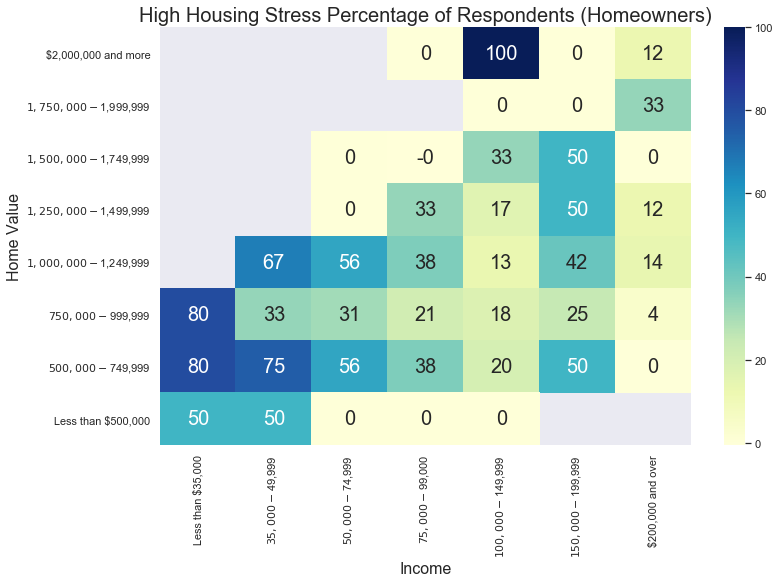

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, $1,000,000-$1,249,999 to Less than $500,000
Data columns (total 7 columns):
$100,000-$149,999    8 non-null float64
$150,000-$199,999    7 non-null float64
$200,000 and over    7 non-null float64
$35,000-$49,999      4 non-null float64
$50,000-$74,999      6 non-null float64
$75,000-$99,000      7 non-null float64
Less than $35,000    3 non-null float64
dtypes: float64(7)
memory usage: 512.0+ bytes
None
{'$2,000,000 and more': [0], '$1,750,000-$1,999,999': [1], '$1,500,000-$1,749,999': [2], '$1,250,000-$1,499,999': [3], '$1,000,000-$1,249,999': [4], '$750,000-$999,999': [5], '$500,000-$749,999': [6], 'Less than $500,000': [7]}
                       Less than $35,000  $35,000-$49,999  $50,000-$74,999  \
$1,000,000-$1,249,999                NaN              3.0              9.0   
$1,250,000-$1,499,999                NaN              NaN              3.0   
$1,500,000-$1,749,999                NaN              NaN              1.0 

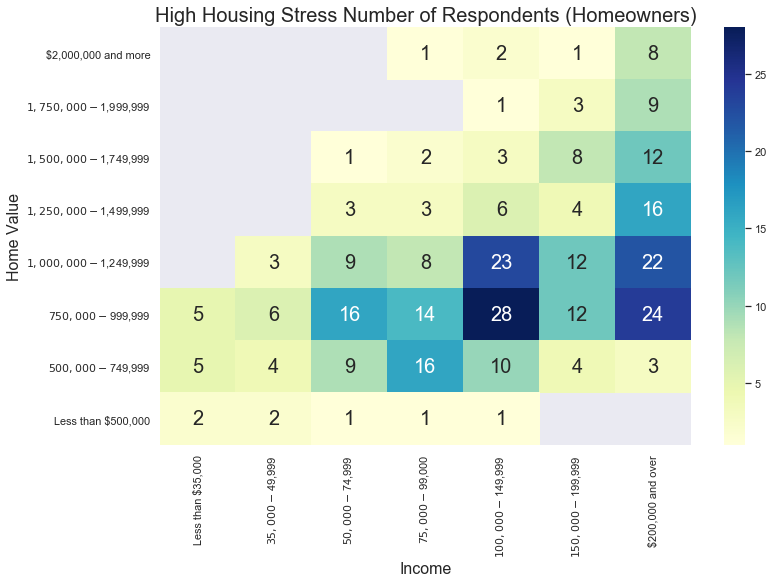

In [21]:
# now lets see what % of respondents have high stress, of those with high property taxes

sns.set(rc={'figure.figsize':(11.7,8.27)})
dfc = high_tax_fraction.loc[(high_tax_fraction['OwnRent']=='Own'),
                 ['HighStress', 'MarketValue', 'Income']]
dfp = pd.pivot_table(dfc,  values='HighStress',
                     index='MarketValue', columns='Income', aggfunc='mean')

#for col in dfp.columns:
#    dfp[col] = dfp[col].astype('int32')
print (dfp.info())

incseq = ['$200,000 and over', '$150,000-$199,999', '$100,000-$149,999', '$75,000-$99,000',
      '$50,000-$74,999', '$35,000-$49,999', 'Less than $35,000']

mvseq = ['$2,000,000 and more', '$1,750,000-$1,999,999', '$1,500,000-$1,749,999',
      '$1,250,000-$1,499,999', '$1,000,000-$1,249,999', '$750,000-$999,999',
      '$500,000-$749,999', 'Less than $500,000']


dfp=dfp[list(reversed(incseq))]
custom_dict = {}
for cntr, i in enumerate(mvseq):
    custom_dict[i] = [cntr]

print (custom_dict)
temp_dict = pd.DataFrame.from_dict(custom_dict, orient='index', columns=['seq'])
#print temp_dict

dfp = dfp.merge(temp_dict, left_index=True, right_index=True, how='inner')
print (dfp)

dfp.sort_values(by=['seq'], inplace=True)
dfp.drop(['seq'], axis=1, inplace=True)
print (dfp)
sns.heatmap(dfp, fmt='.0f', annot=True, cmap='YlGnBu', annot_kws={"size": 20})
ax = plt.gca()
ax.set_title('High Housing Stress Percentage of Respondents (Homeowners)', fontdict={'fontsize':20})
ax.set_ylabel('Home Value', fontsize=16)
ax.set_xlabel('Income', fontsize=16)
plt.tight_layout()
plt.savefig('market_value_income_heatmap_high_stress_high_property_tax_pct.png')
plt.show()


# and count as well: this is count of high stress in these quadrants
# of having high property taxes to begin with
# but not having the denominator, which we had for mean above
sns.set(rc={'figure.figsize':(11.7,8.27)})
dfc = high_tax_fraction.loc[(high_tax_fraction['OwnRent']=='Own'),
                 ['HighStress', 'MarketValue', 'Income']]
dfp = pd.pivot_table(dfc,  values='HighStress',
                     index='MarketValue', columns='Income', aggfunc='count')

#for col in dfp.columns:
#    dfp[col] = dfp[col].astype('int32')
print (dfp.info())

incseq = ['$200,000 and over', '$150,000-$199,999', '$100,000-$149,999', '$75,000-$99,000',
      '$50,000-$74,999', '$35,000-$49,999', 'Less than $35,000']

mvseq = ['$2,000,000 and more', '$1,750,000-$1,999,999', '$1,500,000-$1,749,999',
      '$1,250,000-$1,499,999', '$1,000,000-$1,249,999', '$750,000-$999,999',
      '$500,000-$749,999', 'Less than $500,000']


dfp=dfp[list(reversed(incseq))]
custom_dict = {}
for cntr, i in enumerate(mvseq):
    custom_dict[i] = [cntr]

print (custom_dict)
temp_dict = pd.DataFrame.from_dict(custom_dict, orient='index', columns=['seq'])
#print temp_dict

dfp = dfp.merge(temp_dict, left_index=True, right_index=True, how='inner')
print (dfp)

dfp.sort_values(by=['seq'], inplace=True)
dfp.drop(['seq'], axis=1, inplace=True)
print (dfp)
sns.heatmap(dfp, fmt='.0f', annot=True, cmap='YlGnBu', annot_kws={"size": 20})
ax = plt.gca()
ax.set_title('High Housing Stress Number of Respondents (Homeowners)', fontdict={'fontsize':20})
ax.set_ylabel('Home Value', fontsize=16)
ax.set_xlabel('Income', fontsize=16)
plt.tight_layout()
plt.savefig('market_value_income_heatmap_high_stress_high_property_tax_count.png')
plt.show()